# More Pandas and a Data Cleaning Example

## Housekeeping

* Last week's material.
* HW2, project proposals.
* The midterm.

# Last Week's Material

* Pandas is great for dealing with spreadsheet type data.
* Columns/Indices make it versatile for querying data, but these can be tricky.
* Pandas is well documented - look there first with questions.
* Practice is the best way to get better with Pandas, text cleaning, & coding in general.

# Project Proposals

* I'm STOKED.
* Everyone is doing something unique and interesting.
* The goal is do learn something, and hopefully have somthing to demonstrate your skill.
* I'm here to help you succeed.
* Get to work!

# Midterm

* Opens in OAKS Sep 28, 2022 9:00 PM EDT
* Closes in OAKS Oct 4, 2022 11:59 PM EDT
* 29 questions: T/F, multiple choice, matching.
* Open class notebooks. 
* Please don't collaborate.

# Anything Else?

# Data Cleaning with Pandas

I'm referencing a few tutorials.

* [Oil Spills & Iris dataset](https://machinelarningmastery.com/basic-data-cleaning-for-machine-learning)
* In turn, this tutorial references Kuhn, M., and Johnson, K. (2019) _Feature Engineeing and Selection: A Practical Approach for Predictive Models_ (1st ed). Chapman & Hall/CRC Data Science Series. 

You should also check out this [kaggle tutorial](https://www.kaggle.com/code/ashrafkhan94/oil-spill-imbalanced-classification/notebook).

And the [pandas docs](https://pandas.pydata.org/).

In [1]:
import pandas as pd

# How do we think about data?

* One way is to focus explicitly on the values.
* Another way is to think about the big picture.

Both of these are valuable.

# Iris Dataset

A balanced dataset that describes 3 species (classes) of Iris flower, each with 50 instances (150 total). Each observation has e measurements of different parts of the flower.

[Fisher, R.A. (1936). "The use of multiple measurements in taxonomic problems". _Annual Eugenics_, 7, Part II 179-188.](https://onlinelibrary.wiley.com/doi/10.1111/j.1469-1809.1936.tb02137.x)

[Iris Dataset](https://archive.ics.uci.edu/ml/datasets/iris)

In [2]:
#this dataset has been adulturated
iris_data = r"https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
columns=["Sepal length in cm", "sepal width in cm", "petal length in cm", "petal width in cm", "class"]
iris_df = pd.read_csv(iris_data, header=None, names=columns)

In [3]:
iris_df.head()

,Sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris_df.shape

(150, 5)

One of the simplest errors to check for is duplicated data.

Pandas has a function for that.

In [5]:
# we indeed have duplicates at least for line 37.
iris_df.iloc[33:38]

,Sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class
33,5.5,4.2,1.4,0.2,Iris-setosa
34,4.9,3.1,1.5,0.1,Iris-setosa
35,5.0,3.2,1.2,0.2,Iris-setosa
36,5.5,3.5,1.3,0.2,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa


In [6]:
iris_df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
145    False
146    False
147    False
148    False
149    False
Length: 150, dtype: bool

In [7]:
iris_df[iris_df.duplicated()]

,Sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
142,5.8,2.7,5.1,1.9,Iris-virginica


Rows 34 and 37 duplicate row 9.
Row 142 duplicates row 101.
We can confirm this by making a pandas selection.

In [8]:
iris_df[(iris_df["Sepal length in cm"]==4.9)|(iris_df["Sepal length in cm"]==5.8)]

,Sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class
1,4.9,3.0,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa
14,5.8,4.0,1.2,0.2,Iris-setosa
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
57,4.9,2.4,3.3,1.0,Iris-versicolor
67,5.8,2.7,4.1,1.0,Iris-versicolor
82,5.8,2.7,3.9,1.2,Iris-versicolor
92,5.8,2.6,4.0,1.2,Iris-versicolor
101,5.8,2.7,5.1,1.9,Iris-virginica


In [9]:
#they are easily dropped with drop_duplicates and the inplace keyword argument
iris_df.drop_duplicates(inplace=True)
iris_df

,Sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [10]:
iris_df.shape

(147, 5)

In [11]:
#pandas can tell us a little about the data
iris_df.describe()

,Sepal length in cm,sepal width in cm,petal length in cm,petal width in cm
count,147.000000,147.000000,147.000000,147.000000
mean,5.856463,3.055782,3.780272,1.208844
std,0.829100,0.437009,1.759111,0.757874
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [13]:
iris_df.dtypes

Sepal length in cm    float64
sepal width in cm     float64
petal length in cm    float64
petal width in cm     float64
class                  object
dtype: object

array([[<AxesSubplot:xlabel='Sepal length in cm', ylabel='Sepal length in cm'>,
        <AxesSubplot:xlabel='sepal width in cm', ylabel='Sepal length in cm'>,
        <AxesSubplot:xlabel='petal length in cm', ylabel='Sepal length in cm'>,
        <AxesSubplot:xlabel='petal width in cm', ylabel='Sepal length in cm'>],
       [<AxesSubplot:xlabel='Sepal length in cm', ylabel='sepal width in cm'>,
        <AxesSubplot:xlabel='sepal width in cm', ylabel='sepal width in cm'>,
        <AxesSubplot:xlabel='petal length in cm', ylabel='sepal width in cm'>,
        <AxesSubplot:xlabel='petal width in cm', ylabel='sepal width in cm'>],
       [<AxesSubplot:xlabel='Sepal length in cm', ylabel='petal length in cm'>,
        <AxesSubplot:xlabel='sepal width in cm', ylabel='petal length in cm'>,
        <AxesSubplot:xlabel='petal length in cm', ylabel='petal length in cm'>,
        <AxesSubplot:xlabel='petal width in cm', ylabel='petal length in cm'>],
       [<AxesSubplot:xlabel='Sepal length in cm

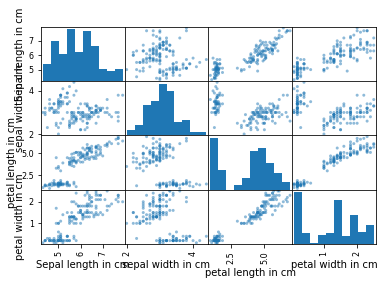

In [14]:
#A scatter matrix gives us a quick way to compare data relationships.
pd.plotting.scatter_matrix(iris_df)

Variables 2 and 3 seem to have a strong linear relationship.

Everything else seems like there could be embedded relationships, given that we're dealing with 3 labels.

array([[<AxesSubplot:xlabel='Sepal length in cm', ylabel='Sepal length in cm'>,
        <AxesSubplot:xlabel='sepal width in cm', ylabel='Sepal length in cm'>,
        <AxesSubplot:xlabel='petal length in cm', ylabel='Sepal length in cm'>,
        <AxesSubplot:xlabel='petal width in cm', ylabel='Sepal length in cm'>],
       [<AxesSubplot:xlabel='Sepal length in cm', ylabel='sepal width in cm'>,
        <AxesSubplot:xlabel='sepal width in cm', ylabel='sepal width in cm'>,
        <AxesSubplot:xlabel='petal length in cm', ylabel='sepal width in cm'>,
        <AxesSubplot:xlabel='petal width in cm', ylabel='sepal width in cm'>],
       [<AxesSubplot:xlabel='Sepal length in cm', ylabel='petal length in cm'>,
        <AxesSubplot:xlabel='sepal width in cm', ylabel='petal length in cm'>,
        <AxesSubplot:xlabel='petal length in cm', ylabel='petal length in cm'>,
        <AxesSubplot:xlabel='petal width in cm', ylabel='petal length in cm'>],
       [<AxesSubplot:xlabel='Sepal length in cm

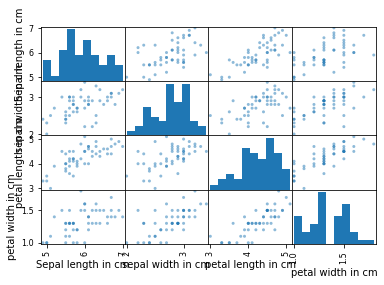

In [15]:
pd.plotting.scatter_matrix(iris_df[iris_df['class']=='Iris-versicolor'])

array([[<AxesSubplot:xlabel='Sepal length in cm', ylabel='Sepal length in cm'>,
        <AxesSubplot:xlabel='sepal width in cm', ylabel='Sepal length in cm'>,
        <AxesSubplot:xlabel='petal length in cm', ylabel='Sepal length in cm'>,
        <AxesSubplot:xlabel='petal width in cm', ylabel='Sepal length in cm'>],
       [<AxesSubplot:xlabel='Sepal length in cm', ylabel='sepal width in cm'>,
        <AxesSubplot:xlabel='sepal width in cm', ylabel='sepal width in cm'>,
        <AxesSubplot:xlabel='petal length in cm', ylabel='sepal width in cm'>,
        <AxesSubplot:xlabel='petal width in cm', ylabel='sepal width in cm'>],
       [<AxesSubplot:xlabel='Sepal length in cm', ylabel='petal length in cm'>,
        <AxesSubplot:xlabel='sepal width in cm', ylabel='petal length in cm'>,
        <AxesSubplot:xlabel='petal length in cm', ylabel='petal length in cm'>,
        <AxesSubplot:xlabel='petal width in cm', ylabel='petal length in cm'>],
       [<AxesSubplot:xlabel='Sepal length in cm

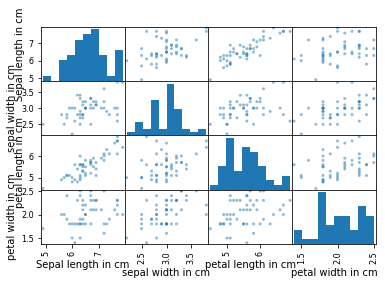

In [16]:
pd.plotting.scatter_matrix(iris_df[iris_df['class']=='Iris-virginica'])

array([[<AxesSubplot:xlabel='Sepal length in cm', ylabel='Sepal length in cm'>,
        <AxesSubplot:xlabel='sepal width in cm', ylabel='Sepal length in cm'>,
        <AxesSubplot:xlabel='petal length in cm', ylabel='Sepal length in cm'>,
        <AxesSubplot:xlabel='petal width in cm', ylabel='Sepal length in cm'>],
       [<AxesSubplot:xlabel='Sepal length in cm', ylabel='sepal width in cm'>,
        <AxesSubplot:xlabel='sepal width in cm', ylabel='sepal width in cm'>,
        <AxesSubplot:xlabel='petal length in cm', ylabel='sepal width in cm'>,
        <AxesSubplot:xlabel='petal width in cm', ylabel='sepal width in cm'>],
       [<AxesSubplot:xlabel='Sepal length in cm', ylabel='petal length in cm'>,
        <AxesSubplot:xlabel='sepal width in cm', ylabel='petal length in cm'>,
        <AxesSubplot:xlabel='petal length in cm', ylabel='petal length in cm'>,
        <AxesSubplot:xlabel='petal width in cm', ylabel='petal length in cm'>],
       [<AxesSubplot:xlabel='Sepal length in cm

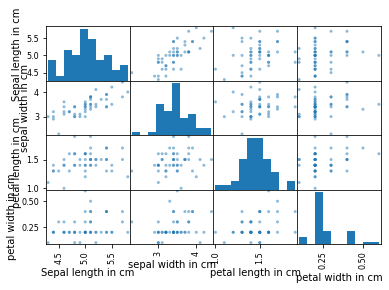

In [17]:
pd.plotting.scatter_matrix(iris_df[iris_df['class']=='Iris-setosa'])

ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not ['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica']

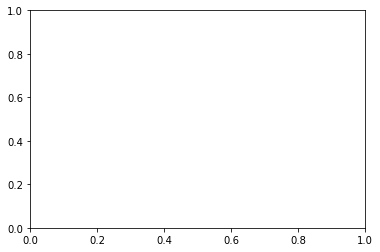

In [18]:
#sometimes, you want to assign a value based on some other value, such as when plotting
iris_df.plot.scatter(x="Sepal length in cm",y="sepal width in cm", c="class")

In [24]:
# we can build a dict of integer values to quite that error, and create a new collumn by mapping it 
int_class={"Iris-versicolor":2, "Iris-setosa":3, "Iris-virginica":4}
iris_df["int_class"] = iris_df["class"].map(int_class)

In [25]:
iris_df.head()

,Sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class,int_class
0,5.1,3.5,1.4,0.2,Iris-setosa,3
1,4.9,3.0,1.4,0.2,Iris-setosa,3
2,4.7,3.2,1.3,0.2,Iris-setosa,3
3,4.6,3.1,1.5,0.2,Iris-setosa,3
4,5.0,3.6,1.4,0.2,Iris-setosa,3


In [26]:
pd.get_dummies(iris_df["class"])

,Iris-setosa,Iris-versicolor,Iris-virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
145,0,0,1
146,0,0,1
147,0,0,1
148,0,0,1


<AxesSubplot:xlabel='Sepal length in cm', ylabel='sepal width in cm'>

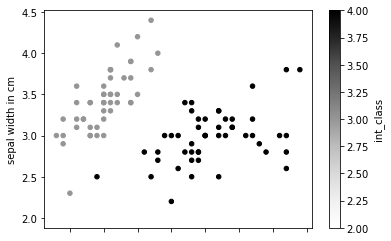

In [27]:
iris_df.plot.scatter(x="Sepal length in cm",y="sepal width in cm", c="int_class")

# Oil Spills Dataset

An imbalanced dataset that describes 41 oil slicks and 896 non-oil slicks.

Each case includes a patch number (column 0), a class label (1 = slick, 0 = no slick), and 48 numerical features derived from computer vision analysis of satellite imagery.

[Kubat, M., Holte, R., & Matwin, S. (1998) Machine learning for the detection of oil spills in satellite radar images. _Machine Learning_, 30, 195-215.](https://link.springer.com/content/pdf/10.1023/A:1007452223027.pdf)

In [28]:
oil_data = r"https://raw.githubusercontent.com/jbrownlee/Datasets/master/oil-spill.csv"
oil_df = pd.read_csv(oil_data, header=None)

oil_df.head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,1,2558,1506.09,456.63,90,6395000.0,40.88,7.89,29780.0,0.19,...,2850.00,1000.00,763.16,135.46,3.73,0,33243.19,65.74,7.95,1
1,2,22325,79.11,841.03,180,55812500.0,51.11,1.21,61900.0,0.02,...,5750.00,11500.00,9593.48,1648.80,0.60,0,51572.04,65.73,6.26,0
2,3,115,1449.85,608.43,88,287500.0,40.42,7.34,3340.0,0.18,...,1400.00,250.00,150.00,45.13,9.33,1,31692.84,65.81,7.84,1
3,4,1201,1562.53,295.65,66,3002500.0,42.40,7.97,18030.0,0.19,...,6041.52,761.58,453.21,144.97,13.33,1,37696.21,65.67,8.07,1
4,5,312,950.27,440.86,37,780000.0,41.43,7.03,3350.0,0.17,...,1320.04,710.63,512.54,109.16,2.58,0,29038.17,65.66,7.35,0


By calling the head of the dataframe, we can see that it has 50 columns as expected.

To determine the shape of the dataset, we can call df.shape

In [29]:
oil_df.shape #50 columns, 937 rows = 41 slicks + 896 non-slicks

(937, 50)

# When is data _valuable_?

When it tells us something!

So, how can we tell if our data is telling us something?

A quick way to explore your data is to look at each column's data type and number of unique values.

In [30]:
# use the dtypes command to get the data type of each column
oil_df.dtypes

0       int64
1       int64
2     float64
3     float64
4       int64
5     float64
6     float64
7     float64
8     float64
9     float64
10    float64
11    float64
12    float64
13    float64
14    float64
15    float64
16    float64
17    float64
18    float64
19    float64
20    float64
21    float64
22      int64
23    float64
24    float64
25    float64
26    float64
27    float64
28    float64
29    float64
30    float64
31    float64
32    float64
33    float64
34      int64
35      int64
36    float64
37    float64
38      int64
39      int64
40    float64
41    float64
42    float64
43    float64
44    float64
45      int64
46    float64
47    float64
48    float64
49      int64
dtype: object

In [31]:
#the pandas describe() method runs some simple statistics on each field.
oil_df.describe()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
count,937.000000,937.000000,937.000000,937.000000,937.000000,9.370000e+02,937.000000,937.000000,937.000000,937.000000,...,937.000000,937.000000,937.000000,937.000000,937.000000,937.000000,937.000000,937.000000,937.000000,937.000000
mean,81.588047,332.842049,698.707086,870.992209,84.121665,7.696964e+05,43.242721,9.127887,3940.712914,0.221003,...,933.928677,427.565582,255.435902,106.112519,5.014002,0.128068,7985.718004,61.694386,8.119723,0.043757
std,64.976730,1931.938570,599.965577,522.799325,45.361771,3.831151e+06,12.718404,3.588878,8167.427625,0.090316,...,1001.681331,715.391648,534.306194,135.617708,5.029151,0.334344,6854.504915,10.412807,2.908895,0.204662
min,1.000000,10.000000,1.920000,1.000000,0.000000,7.031200e+04,21.240000,0.830000,667.000000,0.020000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2051.500000,35.950000,5.810000,0.000000
25%,31.000000,20.000000,85.270000,444.200000,54.000000,1.250000e+05,33.650000,6.750000,1371.000000,0.160000,...,450.000000,180.000000,90.800000,50.120000,2.370000,0.000000,3760.570000,65.720000,6.340000,0.000000
50%,64.000000,65.000000,704.370000,761.280000,73.000000,1.863000e+05,39.970000,8.200000,2090.000000,0.200000,...,685.420000,270.000000,161.650000,73.850000,3.850000,0.000000,5509.430000,65.930000,7.220000,0.000000
75%,124.000000,132.000000,1223.480000,1260.370000,117.000000,3.304680e+05,52.420000,10.760000,3435.000000,0.260000,...,1053.420000,460.980000,265.510000,125.810000,6.320000,0.000000,9521.930000,66.130000,7.840000,0.000000
max,352.000000,32389.000000,1893.080000,2724.570000,180.000000,7.131500e+07,82.640000,24.690000,160740.000000,0.740000,...,11949.330000,11500.000000,9593.480000,1748.130000,76.630000,1.000000,55128.460000,66.450000,15.440000,1.000000


In [35]:
#alternatively summarize the integer columns using the select_dtypes command and the len() command
print('There are {} columns with integer data'.format(len(oil_df.select_dtypes(include=['int']).columns)))
oil_df.select_dtypes(include=['int']).columns

There are 10 columns with integer data


Int64Index([0, 1, 4, 22, 34, 35, 38, 39, 45, 49], dtype='int64')

# What integer data would make sense?

* Column 0 is an integer patch number.
* We know that there is a class label ( 1 = slick, 0 = no slick)
* This is numerical data from an automated process, so it would make sense if data were encoded as ordinal/categorical.

In [37]:
# we can also summarize the integer columns using the select_dtypes command and the len() command
print('There are {} columns with float data'.format(len(oil_df.select_dtypes(include=['float']).columns)))
oil_df.select_dtypes(include=['float']).columns

There are 40 columns with float data


Int64Index([ 2,  3,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
            20, 21, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 36, 37, 40, 41,
            42, 43, 44, 46, 47, 48],
           dtype='int64')

In [38]:
# use the nunique command to get the number of unique values per column.
# what fields are interesting?
counts = oil_df.nunique()
counts

0     238
1     297
2     927
3     933
4     179
5     375
6     820
7     618
8     561
9      57
10    577
11     59
12     73
13    107
14     53
15     91
16    893
17    810
18    170
19     53
20     68
21      9
22      1
23     92
24      9
25      8
26      9
27    308
28    447
29    392
30    107
31     42
32      4
33     45
34    141
35    110
36      3
37    758
38      9
39      9
40    388
41    220
42    644
43    649
44    499
45      2
46    937
47    169
48    286
49      2
dtype: int64

# Initial Analysis

Field 0 is the patch number. Why are there only 238 uniques?

Fields 45 and 49 only have 2 unique integers each. Class label candidates.

Field 22 has only 1 unique value.

Field 46 has a unique value for every case.

A handful of fields have single digit unique values.

It's informative to look at the number of uniqe values per field as a percent of the total number of cases.

In [39]:
for i in range(oil_df.shape[1]):
    num = len(oil_df[i].unique())
    pctg = num/oil_df.shape[0]*100
    print('%d, %d, %.1f%%' % (i, num, pctg))

0, 238, 25.4%
1, 297, 31.7%
2, 927, 98.9%
3, 933, 99.6%
4, 179, 19.1%
5, 375, 40.0%
6, 820, 87.5%
7, 618, 66.0%
8, 561, 59.9%
9, 57, 6.1%
10, 577, 61.6%
11, 59, 6.3%
12, 73, 7.8%
13, 107, 11.4%
14, 53, 5.7%
15, 91, 9.7%
16, 893, 95.3%
17, 810, 86.4%
18, 170, 18.1%
19, 53, 5.7%
20, 68, 7.3%
21, 9, 1.0%
22, 1, 0.1%
23, 92, 9.8%
24, 9, 1.0%
25, 8, 0.9%
26, 9, 1.0%
27, 308, 32.9%
28, 447, 47.7%
29, 392, 41.8%
30, 107, 11.4%
31, 42, 4.5%
32, 4, 0.4%
33, 45, 4.8%
34, 141, 15.0%
35, 110, 11.7%
36, 3, 0.3%
37, 758, 80.9%
38, 9, 1.0%
39, 9, 1.0%
40, 388, 41.4%
41, 220, 23.5%
42, 644, 68.7%
43, 649, 69.3%
44, 499, 53.3%
45, 2, 0.2%
46, 937, 100.0%
47, 169, 18.0%
48, 286, 30.5%
49, 2, 0.2%


What's the variance of a field with one unique value?

In [40]:
oil_df[22].var()

0.0

This doesn't tell us anything, so we can exclude it. The tutorial goes into applying variance thresholds on the data colums as a means of identifying columns to drop based on varying criteria. It's overkill for now, but feel free to explore it on your own.

For the sake of argument, let's assume it's appropriate to discard anything with variance = 0 and columns with fewer than 1% unique values, except for the class label.

Which field is the class label?

In [41]:
# Columns 45 and 49 both have 2 unique values. We know one should have 41 instances of 1 and 896 instances of 0
oil_df[oil_df[45]==1].shape[0], oil_df[oil_df[45]==0].shape[0]

(120, 817)

In [42]:
# It doesn't appear to be column 45. Try 49.
oil_df[oil_df[49]==1].shape[0], oil_df[oil_df[49]==0].shape[0]

(41, 896)

Column 49 is the class label.

In [43]:
#let's see the label weights as percent.
pct_spill = oil_df[oil_df[49]==1].shape[0]/oil_df.shape[0]*100
pct_nospill=oil_df[oil_df[49]==0].shape[0]/oil_df.shape[0]*100
print('Class 1: %.3f%%, Class 0: %.3f%%' % (pct_spill, pct_nospill))

Class 1: 4.376%, Class 0: 95.624%


<AxesSubplot:>

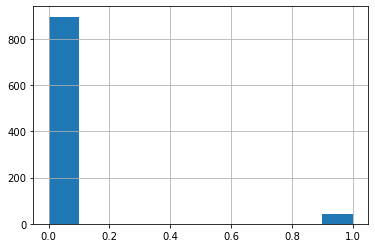

In [44]:
# pandas has some helpful plotting functionality
oil_df[49].hist()

<AxesSubplot:>

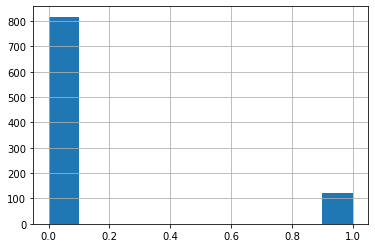

In [45]:
# let's look at column 45. It's very similar to column 49.
oil_df[45].hist()

In [ ]:
# visualize the columns as histograms to see distributions.
import matplotlib.pyplot as plt #import pyplot 

fig = plt.figure(figsize=(50,50)) #create a figure
ax = fig.gca() #assign an axis variable that gets the current axis
_ = oil_df.hist(ax=ax) #plot a histogram that uses data frame fields assigning a new axis to each field.

In [ ]:
# recall we said it was appropriate to delete anything with variance less than 1
to_del = [i for i, v in enumerate (counts) if (v/oil_df.shape[0]*100) <= 1]
to_del

In [ ]:
# how many are we deleting?
len(to_del)

In [ ]:
# let's save the patch names and the labels as series to their own variables
patches = oil_df[0]
labels = oil_df[49]

In [ ]:
# drop the low variance fields in place by specifying them in the first axis.
oil_df.drop(to_del, axis=1, inplace=True)

In [ ]:
#check the shape of the resulting dataframe.
oil_df.shape

In [ ]:
# we can join the patches and labels series into a dataframe using the pandas concat method.
pd.concat([patches, labels], axis=1)

In [ ]:
# the concat method defaults to axis 0, which appends series end to end.
pd.concat([patches,labels])